In [1]:
import signac
import matplotlib.pyplot as plt
import numpy as np

In [2]:
project = signac.get_project()
df = project.to_dataframe()
df

,sp.pull_group1,sp.pull_group2,sp.eq_steps,sp.pull_constant,sp.pull_rate,sp.pull_steps,sp.data_dir,sp.pdbID,doc.min_coords,doc.max_coords,doc.growth_axis,doc.pulling_length,doc.box_size,doc.cross_sectional_area,doc.strain,doc.stress,doc.ultimate_tensile_strength,doc.elastic_modulus
bc777e0f73414f3e39360f49b324200f,0,-1,15000,5000,0.01,250000,/data/yang_lab/nehilpkd/biomatsims/smd/solenoi...,2rnm,"[-0.807, -0.132, -0.111]","[6.38, 6.034, 5.815]",0.0,35.935,"[35.935, 12.331999999999999, 11.852]",3.732403e-18,"[0.0, 0.00012156622890156401, 0.00019374617731...","[64.25618302492283, 910675.93154961, 1998637.0...",3.767921e+08,9.341586e+08
b86c72e5cd63ca917276e109f40c158f,0,-1,15000,5000,0.01,250000,/data/yang_lab/nehilpkd/biomatsims/smd/solenoi...,5aej,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8639b7dc5526a66af434fe31a47b499f,0,-1,15000,5000,0.01,250000,/data/yang_lab/nehilpkd/biomatsims/smd/solenoi...,5wor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c8b3d5e3493dd6e5850b0b6fba28e225,0,-1,15000,5000,0.01,250000,/data/yang_lab/nehilpkd/biomatsims/smd/solenoi...,6eka,"[-0.065, 0.0, 0.0]","[5.527, 4.352, 3.372]",0.0,27.960,"[27.96, 8.704, 6.744]",NaN,NaN,NaN,NaN,NaN
be42680255a6cbcd76fb86346ada06a0,0,-1,15000,5000,0.01,250000,/data/yang_lab/nehilpkd/biomatsims/smd/solenoi...,6ria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4c6f06c150552063071364bf4ff6af65,0,-1,15000,5000,0.01,250000,/data/yang_lab/nehilpkd/biomatsims/smd/solenoi...,6rib,"[-0.032, 0.0, 0.0]","[3.8, 6.829, 32.77]",2.0,163.850,"[7.664, 13.658, 163.85000000000002]",1.830029e-17,"[0.0, -0.006864033329015054, -0.02372492047139...","[-2.527779778553793, 2097108.9797986539, 68508...",5.061603e+07,4.555145e+07
e50d33b74f43200733e1477bd2e1c1d0,0,-1,15000,5000,0.01,250000,/data/yang_lab/nehilpkd/biomatsims/smd/solenoi...,7b90,"[-0.075, 0.0, 0.0]","[4.495, 4.327, 23.697]",2.0,118.485,"[9.14, 8.654, 118.485]",9.352879e-18,"[0.0, 0.0003146776837692626, -0.00033497946981...","[8.405657426753077, 201784.9181894051, 1421284...",1.213348e+08,6.307215e+08
5c4a52ca934bc4854bc78f9b71b391af,0,-1,15000,5000,0.01,250000,/data/yang_lab/nehilpkd/biomatsims/smd/solenoi...,7bfc,"[0.0, 0.0, 0.0]","[10.776, 7.059, 14.597]",2.0,72.985,"[21.552, 14.118, 72.985]",9.736732e-18,"[0.0, 0.001295336787564816, 0.0038601036269430...","[-139.19556959114115, -7187370.235106686, -219...",6.633293e+07,1.808228e+09
99c8b974cb10cdf1bb02b8160776c20c,0,-1,15000,5000,0.01,250000,/data/yang_lab/nehilpkd/biomatsims/smd/solenoi...,7pnb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92496131a654c4c8c39d41d921047ab6,0,-1,15000,5000,0.01,250000,/data/yang_lab/nehilpkd/biomatsims/smd/solenoi...,7pqc,"[0.0, 0.0, 0.0]","[9.857, 10.91, 59.955]",2.0,299.775,"[19.714, 21.82, 299.775]",NaN,NaN,NaN,NaN,NaN


Error in 7y8q


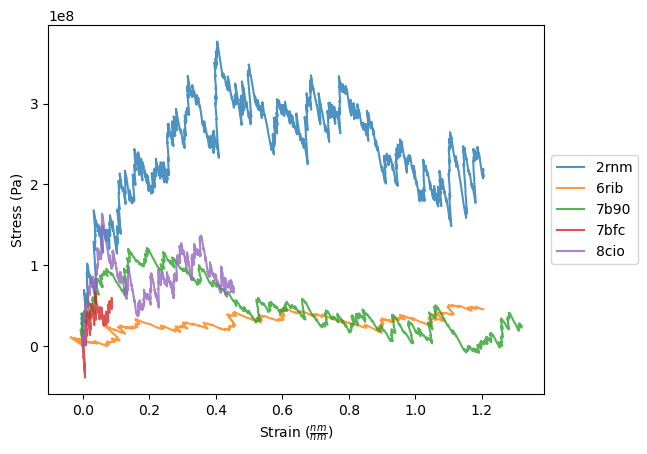

In [3]:
for job in project:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
                continue
            stress = np.array(job.doc.get('stress'))
            plt.plot(np.array(job.doc['strain']), np.array(stress), label=job.sp.pdbID, alpha=.8)
        except:
            print(f'Error in {job.sp.pdbID}')
plt.xlabel('Strain $(\\frac{nm}{nm})$')
plt.ylabel('Stress (Pa)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylim(0)
# plt.xlim(0,2)
plt.show()
plt.close()

# # Ashby plot
# for job in project:
#     if 'stress' in job.doc:
#         try:
#             if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
#                 continue
#             plt.scatter(np.array(job.doc['ultimate_tensile_strength']), np.array(job.doc['elastic_modulus']), label=job.sp.pdbID, edgecolors='k', color = 'black')
#         except:
#             print(f'Error in {job.sp.pdbID}')
# plt.xlabel('Tensile Strength (Pa)')
# plt.ylabel('Elastic modulus (Pa)')
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim(1e8, 1e10)
# plt.ylim(1e7, 1e11)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))